#Assignment 3:

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json
#import sys
#import urllib2

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


### 2014 October ~ 2015 Septemper
* Spring+Summer: Apr, May, Jun, Jul, Aug, Sep
* Fall+Winter: Oct, Nov, Dec, Jan, Feb, Mar

In [2]:
df_10=pd.read_csv('201410-citibike-tripdata.csv')
df_11=pd.read_csv('201411-citibike-tripdata.csv')
df_12=pd.read_csv('201412-citibike-tripdata.csv')
df_01=pd.read_csv('201501-citibike-tripdata.csv')
df_02=pd.read_csv('201502-citibike-tripdata.csv')
df_03=pd.read_csv('201503-citibike-tripdata.csv')
df_04=pd.read_csv('201504-citibike-tripdata.csv')
df_05=pd.read_csv('201505-citibike-tripdata.csv')
df_06=pd.read_csv('201506-citibike-tripdata.csv')
df_07=pd.read_csv('201507-citibike-tripdata.csv')
df_08=pd.read_csv('201508-citibike-tripdata.csv')
df_09=pd.read_csv('201509-citibike-tripdata.csv')

In [3]:
# Merge data (Winter vs Summer)
#framesW = [df_10, df_11, df_12, df_01, df_02, df_03]
#df_W = pd.concat(framesW)
#framesS = [df_04, df_05, df_06, df_07, df_08, df_09]
#df_S = pd.concat(framesS)

In [4]:
# Merge data (Winter vs Summer)
df_W = df_10.append([df_11, df_12, df_01, df_02, df_03],ignore_index = True)
df_S = df_04.append([df_05, df_06, df_07, df_08, df_09],ignore_index = True)

In [5]:
print df_W.count()
print df_S.count()

tripduration               2581276
starttime                  2581276
stoptime                   2581276
start station id           2581276
start station name         2581276
start station latitude     2581276
start station longitude    2581276
end station id             2581276
end station name           2581276
end station latitude       2581276
end station longitude      2581276
bikeid                     2581276
usertype                   2581276
birth year                 2446919
gender                     2581276
dtype: int64
tripduration               6110014
starttime                  6110014
stoptime                   6110014
start station id           6110014
start station name         6110014
start station latitude     6110014
start station longitude    6110014
end station id             6110014
end station name           6110014
end station latitude       6110014
end station longitude      6110014
bikeid                     6110014
usertype                   6110014
birth y

In [6]:
# Calculate age of subscriber by season
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

In [7]:
print df_W.head(2)
print df_S.head(2)

   tripduration           starttime            stoptime  start station id  \
0          1027  10/1/2014 00:00:27  10/1/2014 00:17:34               479   
1           534  10/1/2014 00:00:36  10/1/2014 00:09:30               417   

       start station name  start station latitude  start station longitude  \
0         9 Ave & W 45 St               40.760193               -73.991255   
1  Barclay St & Church St               40.712912               -74.010202   

   end station id         end station name  end station latitude  \
0             540  Lexington Ave & E 26 St             40.741473   
1             417   Barclay St & Church St             40.712912   

   end station longitude  bikeid    usertype  birth year  gender  age  
0             -73.983209   21376  Subscriber        1977       1   38  
1             -74.010202   16086  Subscriber        1974       2   41  
   tripduration          starttime           stoptime  start station id  \
0           241  4/1/2015 00:00:23  4

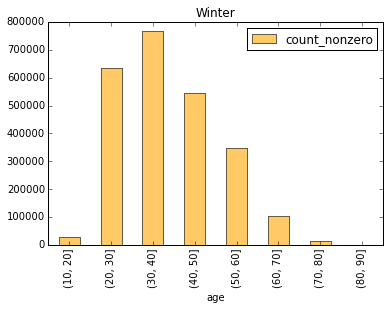

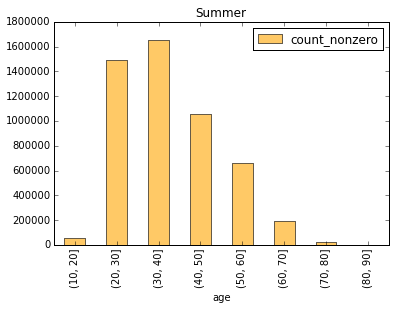

In [10]:
#split age in 10 year bins
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter", color='Orange', alpha=0.6)
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer", color='Orange', alpha=0.6)
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])

##KS tests for goodness of fit

In [26]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "* winter, normal fit", ksW
print "* summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "* winter, poisson fit", ksW
print "* summer, poisson fit", ksS

ksW=scipy.stats.kstest(W_age_dist, 'logistic')
ksS=scipy.stats.kstest(S_age_dist, 'logistic')
print "* winter, logistic fit", ksW
print "* summer, logistic fit", ksS

* winter, normal fit (1.0, 0.0)
* summer, normal fit (1.0, 0.0)
* winter, poisson fit (0.99999958611279782, 0.0)
* summer, poisson fit (0.99999980724659676, 0.0)
* winter, logistic fit (1.0, 0.0)
* summer, logistic fit (1.0, 0.0)


###Result
* p value of KS(Winter data on normal) is 0.0 which is lower than significant level 5%. From this, NULL hypothesis (the sample does not come from the model distribution) can be accpted. Therefore, the sample and model distributions are not same.
* p value of KS(Summer data on normal) is 0.0 which is lower than significant level 5%. From this, NULL hypothesis is accepted. Therefore age distribution of Summer doesn't come from normal distribution.
* p value of KS(Winter data on poisson) is 0.0 which is lower than significant leverl 5%. From this, NULL hypothesis can not be rejected. Therefore, the age distribution of winter is not same with possion distribution.
* p value of KS(Summer data on poisson) is 0.0 which is lower than significant leverl 5%. From this, NULL hypothesis can not be rejected. Therefore, the age distribution of summer is not same with possion distribution.

##Anderson Darling test for goodness of fit

In [20]:
#compare to normal

adW=scipy.stats.anderson(df_W.age[~np.isnan(df_W.age)], dist='norm')
adS=scipy.stats.anderson(df_S.age[~np.isnan(df_S.age)], dist='norm')
print "* winter, normal fit", adW
print "* summer, normal fit", adS

#compare to poisson 

adW=scipy.stats.anderson(df_W.age[~np.isnan(df_W.age)], dist='logistic')
adS=scipy.stats.anderson(df_S.age[~np.isnan(df_S.age)], dist='logistic')
print "* winter, logistic fit", adW
print "* summer, logistic fit", adS

#scipy.stats.anderson(dist_n, dist='norm')
#df.ageS[~np.isnan(df.ageS)]

* winter, normal fit (27828.428994094953, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
* summer, normal fit (75925.564914559945, array([ 0.576,  0.656,  0.787,  0.918,  1.092]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
* winter, logistic fit (27890.305466790684, array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))
* summer, logistic fit (70974.883077922277, array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))


###Result
* Anderson(Winter on normal) is 27828.43 which is much larger than threshold value at significant level 5%. It means distribution is not likely to be related. In terms of rejection of the NULL hypothesis, the NULL hypothesis (the sample does not come form the model distribution) is not rejected. Therefore, the age distribution of winter data is not same with normal distribution.
* Anderson(Summer on normal) is 75925.56 which is much larger than threshold value at significant level 5%. It means distribution is not likely to be related. In terms of rejection of the NULL hypothesis, the NULL hypothesis (the sample does not come form the model distribution) is not rejected. Therefore, the age distribution of summer data is not same with normal distribution.
* Anderson(Winter on logistic) is 27890.30 which is much larger than threshold value at significant level 5%. It means distribution is not likely to be related. In terms of rejection of the NULL hypothesis, the NULL hypothesis (the sample does not come form the model distribution) is not rejected. Therefore, the age distribution of winter data is not same with logistic distribution.
* Anderson(Summer on logistic) is 70974.88 which is much larger than threshold value at significant level 5%. It means distribution is not likely to be related. In terms of rejection of the NULL hypothesis, the NULL hypothesis (the sample does not come form the model distribution) is not rejected. Therefore, the age distribution of summer data is not same with logistic distribution.